In [5]:
using LaTeXStrings, JLD, ProgressMeter, Latexify, Plots
figpath = "../../Figs/Q3/"
datapath = "../../Data/Q3/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)
LogisticMap = (r, x) -> 4 * r .* x .* (1 .- x)

#3 (generic function with 1 method)

In [2]:
rlist = [collect(range(0.0, 0.895, length = 10000)); collect(range(0.895, 1.0, length = 30000))]
xlist = rand(length(rlist), 100)

prog = Progress(10^5)

for _ ∈ 1:10^5
    xlist = LogisticMap(rlist, xlist)
    next!(prog)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:23:26mm


In [ ]:
# save(datapath * "logmap.jld", "rlist", rlist, "xlist", xlist)
xlist = load(datapath * "logmap.jld")["xlist"]
rlist = load(datapath * "logmap.jld")["rlist"]
plt = begin
    scatter(rlist, xlist[:, 1:5:end], ms = 0.5, msw = 0.0, legend = false, color = :black, alpha = 0.5)
    plot!([0.25, 0.25], [0, 1], c = :red, lw = 0.25)
    plot!([0.75, 0.75], [0, 1], c = :red, lw = 0.25)
    plot!([0.886, 0.886], [0, 1], c = :red, lw = 0.25)
    plot!([0.891, 0.891], [0, 1], c = :red, lw = 0.25)
    plot!(xlabel = L"\mathcal{r}", ylabel = L"\mathcal{x}_n", title = L"n = 10^5,\ Logistic\ Map\ Plot")
end
savefig(plt, figpath * "logmap.pdf")
# display(plt)

In [15]:
Nlist = 2 .^ collect(1:6)
rindexlist = Int64[1398]
for n ∈ Nlist
    index = findfirst(i -> length(unique(round.(xlist[i, :], digits = 5))) == n, 1:length(rlist))
    push!(rindexlist, index)
end

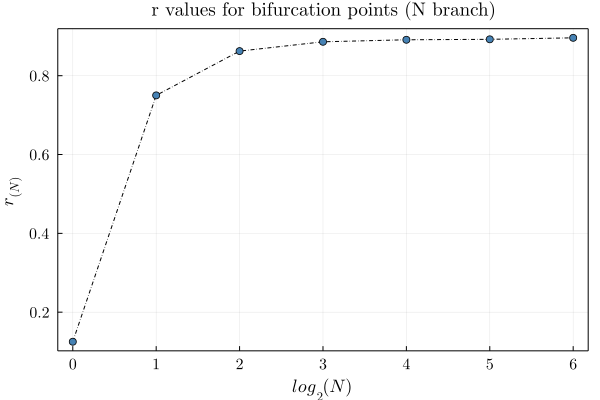

In [16]:
plot(0:6, rlist[rindexlist], ls = :dashdot, c = :black, marker = :circle, markercolor = :steelblue,
    xlabel = L"log_2(N)", ylabel = L"\mathcal{r}_{(N)}", title = "r values for bifurcation points (N branch)")

In [98]:
δ = round((rlist[rindexlist][4] - rlist[rindexlist][3]) / (rlist[rindexlist][5] - rlist[rindexlist][4]), digits = 4)
latexify(L"r_{bifurcate} = %$(round.(rlist[rindexlist], digits = 4))\\ \Rightarrow r_{n-2} = %$(round.(rlist[rindexlist], digits = 4)[4])\ ,
    r_{n-1} = %$(round.(rlist[rindexlist], digits = 4)[5])\ ,r_{n} = %$(round.(rlist[rindexlist], digits = 4)[6])\\
        \delta = %$δ")

L"$r_{bifurcate} = [0.125, 0.7501, 0.8624, 0.886, 0.8912, 0.8923, 0.8961]\\ \Rightarrow r_{n-2} = 0.886\ ,
    r_{n-1} = 0.8912\ ,r_{n} = 0.8923\\
        \delta = 4.6316$"

In [71]:
rₙ₋₂ = findfirst(n -> 1 / 2 ∈ unique(ceil.(xlist[n, :], digits = 3)), rindexlist[2]:rindexlist[3]) + rindexlist[2]
rₙ₋₁ = findfirst(n -> 1 / 2 ∈ unique(ceil.(xlist[n, :], digits = 3)), rindexlist[3]:rindexlist[4]) + rindexlist[3]
rₙ = findfirst(n -> 1 / 2 ∈ unique(ceil.(xlist[n, :], digits = 3)), rindexlist[4]:rindexlist[5]) + rindexlist[4]
latexify(L"r_{n-2} = %$(round.(rlist[rₙ₋₂], digits = 4))\ 
    ,r_{n-1} = %$(round.(rlist[rₙ₋₁], digits = 4))\ 
        ,r_{n} = %$(round.(rlist[rₙ], digits = 4))")

L"$r_{n-2} = 0.8092\ 
    ,r_{n-1} = 0.8744\ 
        ,r_{n} = 0.8888$"

In [99]:
xlistₙ = sort(unique(round.(xlist[rₙ, :], digits = 2)))
Δxₙ = xlistₙ[4] - xlistₙ[3]
xlistₙ₋₁ = sort(unique(round.(xlist[rₙ₋₁, :], digits = 2)))
Δxₙ₋₁ = xlistₙ₋₁[2] - xlistₙ₋₁[1]
xlistₙ₋₂ = sort(unique(round.(xlist[rₙ₋₂, :], digits = 2)))
Δxₙ₋₂ = xlistₙ₋₂[2] - xlistₙ₋₂[1]
α = round((Δxₙ₋₁ - Δxₙ₋₂) / (Δxₙ - Δxₙ₋₁), digits = 4)
latexify(L"\Delta x_{n} = %$(round(Δxₙ, digits = 4)),\ \Delta x_{n-1} = %$(round(Δxₙ₋₁, digits = 4)),\ \Delta x_{n-2} = %$(round(Δxₙ₋₂, digits = 4))\\
    \rightarrow \alpha = %$α")

L"$\Delta x_{n} = 0.05,\ \Delta x_{n-1} = 0.12,\ \Delta x_{n-2} = 0.31\\
    \rightarrow \alpha = 2.7143$"